In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

df = pd.read_csv('../datasets/titanic.csv')

In [3]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].max()

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

In [6]:
# average age for female/male for those who embarked section C


# df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [7]:
# who is the oldest male/female for those that embarked section C
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].max()


Sex
female    60.0
male      71.0
Name: Age, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


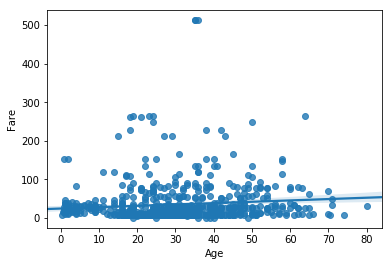

In [8]:
# for different ages, plot the fare they paid
# continuous data. On any axis, data can take almost any value between min and max
sns.regplot(x = "Age", y = "Fare", data = df)

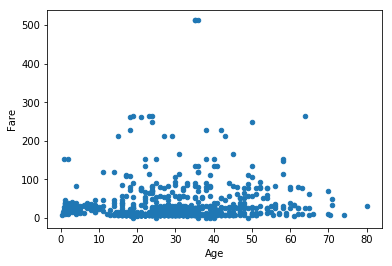

In [9]:
df.plot.scatter(x = "Age", y = "Fare")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


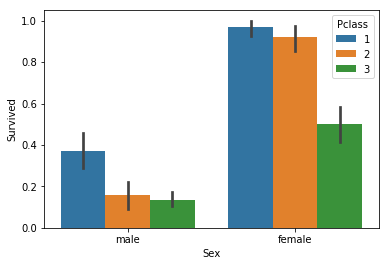

In [10]:
# percentage survived for male/female based on passenger class
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = df)

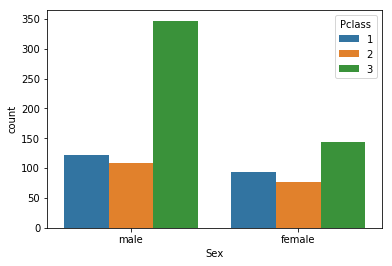

In [11]:
# how many male/female were in different passenger classes
sns.countplot(x = "Sex", hue = "Pclass", data = df)


In [12]:
len(df[(df['Sex'] == "female") & (df['Survived'] == 1) & (df['Pclass'] == 1)])/len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])

0.9680851063829787

In [13]:
len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Pclass'] == 1)])

91

In [ ]:
len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])

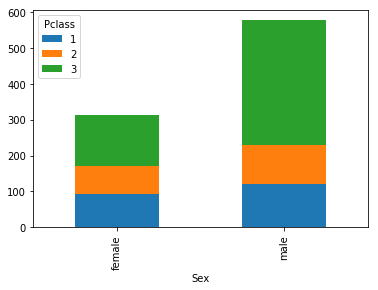

In [14]:
# Stack plots of counts based on sex for different passenger classes
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)

In [15]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [16]:
df.groupby(['Sex'])['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

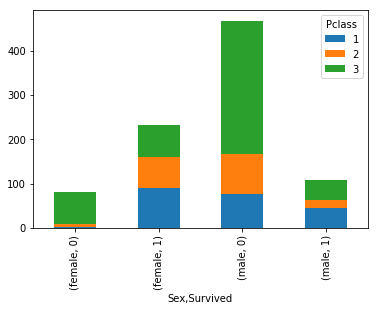

In [17]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)

In [18]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [19]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [20]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


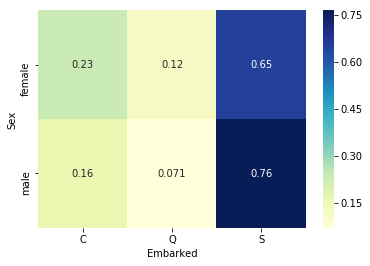

In [22]:
# how to represent above cross tab in percent and graphically present

sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize = 'index'), cmap ='YlGnBu', annot = True)

In [23]:
adf = pd.DataFrame(data = {'x1': ['A', 'B', 'C'], 'x2': [1, 2, 3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [24]:

bdf = pd.DataFrame(data = {'x1': ['A', 'B', 'D'], 'x3': ['T', 'F', 'T']})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [25]:
# Merge adf and bdf based on adf
pd.merge(adf, bdf, how='left')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [26]:
# Merge adf and bdf based on bdf
pd.merge(adf, bdf, how='right')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [ ]:
# Merge adf and bdf based on what they have in common
pd.merge(adf, bdf, how='inner')

In [ ]:
# another method for above task. Merge defaults to inner
pd.merge(adf, bdf)

In [27]:
# union of merge for adf and bdf
pd.merge(adf, bdf, how='outer')


,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [28]:
pd.concat([adf, bdf], sort = True)


,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [29]:
# column-wise concatination
pd.concat([adf, bdf], axis = 1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [32]:

cdf = pd.DataFrame(data = {'x1': ['A', 'B', 'C'], 'x3': ['T', 'F', 'T']})
cdf

,x1,x3
0,A,T
1,B,F
2,C,T


In [33]:
pd.concat([adf, cdf], axis = 1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,C,T


In [34]:
pd.concat([adf, cdf], sort = False)

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,C,NaN,T


In [35]:

pd.merge(adf, cdf, how = 'left')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,T


In [ ]:
# slicing dataframe based on largest value for a specific column
import numpy as np

df = pd.DataFrame({'a': [1, 10, 8, 11, -1],'b': list('abdce'), 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df

In [ ]:

data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df